In [1]:
import sys
import os
sys.path.insert(0, os.path.dirname(os.getcwd()))
from config import *

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

In [20]:
dst = DecisionTreeClassifier()
clf = AdaBoostClassifier(base_estimator=dst)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:811: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


<module 'matplotlib.pyplot' from '/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

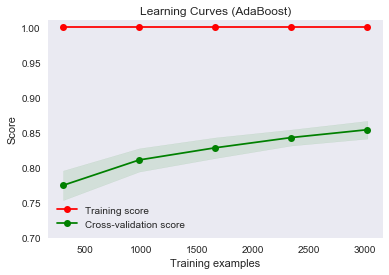

In [21]:
title = "Learning Curves (AdaBoost)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(clf, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

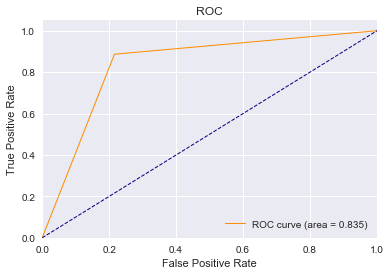

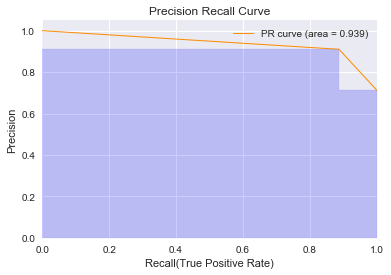

In [22]:
# plot - ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

# plot - PR-AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])
pr_auc = average_precision_score(y_test, y_prob[:, 1])

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=1, label='PR curve (area = %0.3f)' % pr_auc)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall(True Positive Rate)')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="upper right")

In [5]:
dst = DecisionTreeClassifier(max_depth=5)     # prun more aggressively
clf = AdaBoostClassifier(base_estimator=dst)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:811: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


<module 'matplotlib.pyplot' from '/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

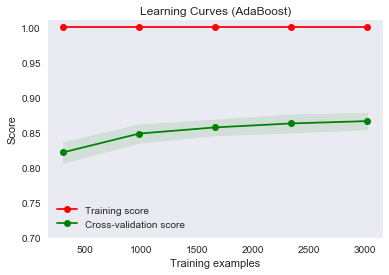

In [6]:
title = "Learning Curves (AdaBoost)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(clf, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

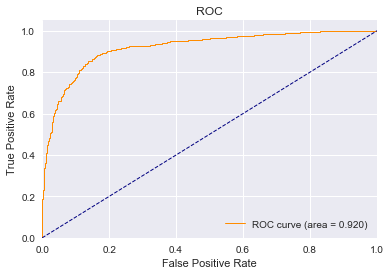

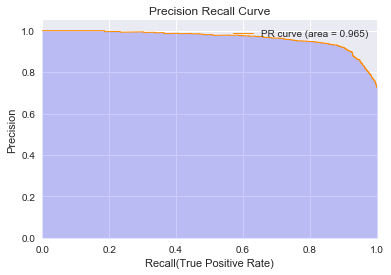

In [7]:
# plot - ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

# plot - PR-AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])
pr_auc = average_precision_score(y_test, y_prob[:, 1])

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=1, label='PR curve (area = %0.3f)' % pr_auc)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall(True Positive Rate)')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="upper right")

In [ ]:
# Tuning: n_estimators, learning_rate, tree-specific hps
